In [39]:
import pandas as pd
import numpy as np

In [4]:
# Series 객체
# merge() 예제 리스트 데이터셋
employee = [{'empno':1, 'ename':'kim', 'dept':1},
            {'empno':2, 'ename':'lee', 'dept':2},
            {'empno':3, 'ename':'park', 'dept':1},
            {'empno':4, 'ename':'song', 'dept':3},
            {'empno':5, 'ename':'min', 'dept':2} ]
dept=[{'dept':1, 'deptname':'관리직'},
      {'dept':2, 'deptname':'영업직'},
      {'dept':3, 'deptname':'개발직'} ]
info =[{'empno':1, 'addr':'서울시','phone':'010-1111-1111'},
       {'empno':3, 'addr':'부산시','phone':'010-2222-2222'},
       {'empno':2, 'addr':'광주시','phone':'010-3333-3333'},
       {'empno':5, 'addr':'광주시','phone':'010-4444-4444'},
       {'empno':4, 'addr':'광주시','phone':'010-5555-5555'} ]
emp = pd.DataFrame(employee)
dept = pd.DataFrame(dept)
info = pd.DataFrame(info)

m = pd.merge(emp, dept, how = 'inner') # 조건을 안줘도 공통된것을 알아서 찾아준다.
m2 = pd.merge(m, info, how = 'inner')
m2.drop(columns = ['empno'], inplace = True)
m2

,ename,dept,deptname,addr,phone
0,kim,1,관리직,서울시,010-1111-1111
1,park,1,관리직,부산시,010-2222-2222
2,lee,2,영업직,광주시,010-3333-3333
3,min,2,영업직,광주시,010-4444-4444
4,song,3,개발직,광주시,010-5555-5555


In [6]:
# str.contains()메서드를 사용하여 문자열의 조건 검색, 행을 추출
m3 = m2['ename'].str.contains('k') # ename 열에서 k를 포함하는것만 Series로 추출
print(m3, type(m3))

0     True
1     True
2    False
3    False
4    False
Name: ename, dtype: bool <class 'pandas.core.series.Series'>


In [7]:
m2[m3]

,ename,dept,deptname,addr,phone
0,kim,1,관리직,서울시,010-1111-1111
1,park,1,관리직,부산시,010-2222-2222


In [8]:
# deptname 이 영업직인 행만 추출
m4 = m2['deptname'].str.contains('영업직')
print(m2[m4])
# 'addr'가 '광주시'인 행만 추출
m4 = m2['addr'].str.contains('광주시')
print(m2[m4])

  ename  dept deptname addr          phone
2   lee     2      영업직  광주시  010-3333-3333
3   min     2      영업직  광주시  010-4444-4444
  ename  dept deptname addr          phone
2   lee     2      영업직  광주시  010-3333-3333
3   min     2      영업직  광주시  010-4444-4444
4  song     3      개발직  광주시  010-5555-5555


In [17]:
score_table = {'영어' : [10, 20, 30, 40 ,50],
               '수학' : [50, 40, 30, 20, 10]}
df1 = pd.DataFrame(score_table)
sr = df1['영어']
print(sr.sum())
print(sr.mean())
print(sr.median())
print(sr.max())
print(sr.min())
print(sr.std())
print(sr.var())
print(sr.count())
print(sr.describe())

150
30.0
30.0
50
10
15.811388300841896
250.0
5
count     5.000000
mean     30.000000
std      15.811388
min      10.000000
25%      20.000000
50%      30.000000
75%      40.000000
max      50.000000
Name: 영어, dtype: float64


### 누락 데이터(결측치, NaN, NaT) 다루기

In [46]:
df = pd.read_csv('WHO_first9cols.csv')
df.count()
df2 = df[['Country', df.columns[-2]]]
df2

# print(pd.isnull(df2)) # 결측치는 True로 반환
# print(pd.notnull(df2)) # 결측치는 False로 반환
pd.isnull(df2).sum() # 결측치의 수
pd.isnull(df).sum() # 결측치의 수

Country                                                    0
CountryID                                                  0
Continent                                                  0
Adolescent fertility rate (%)                             25
Adult literacy rate (%)                                   71
Gross national income per capita (PPP international $)    24
Net primary school enrolment ratio female (%)             23
Net primary school enrolment ratio male (%)               23
Population (in thousands) total                           13
dtype: int64

In [62]:
# 결측치를 0으로 채우기
# df2
#df3 = df2.fillna(0)
#df3
df3 = df2.replace(np.nan, 0)
# df3 = df.replace(np.nan, 0)
# df3

In [63]:
print(df2.describe())
print(df3.describe())

       Net primary school enrolment ratio male (%)
count                                   179.000000
mean                                     85.698324
std                                      15.451212
min                                      11.000000
25%                                      79.500000
50%                                      90.000000
75%                                      96.000000
max                                     100.000000
       Net primary school enrolment ratio male (%)
count                                   202.000000
mean                                     75.940594
std                                      30.921123
min                                       0.000000
25%                                      73.000000
50%                                      89.500000
75%                                      96.000000
max                                     100.000000


In [66]:
# 결측치를 평균으로 채움 : 평균에 영향이 없음.
df4 = df2.fillna(df2.mean())
df4

,Country,Net primary school enrolment ratio male (%)
0,Afghanistan,85.698324
1,Albania,94.000000
2,Algeria,96.000000
3,Andorra,83.000000
4,Angola,51.000000
...,...,...
197,Vietnam,96.000000
198,West Bank and Gaza,85.698324
199,Yemen,85.000000
200,Zambia,90.000000


In [76]:
# Series 객체의 index 사용 및 결측치 제어
index_table = ['tv', 'vtr', 'phone']
sr = pd.Series([10, 20, 30], index = index_table)
type(sr)
sr
sr.index
r = sr.index.str.contains('v')
sr[r]

tv     10
vtr    20
dtype: int64

In [85]:
sr2 = sr.append(pd.Series([40, 50, 60], index = ['audio', 'iron', 'notebook']))
sr2
sr3 = sr2.append(pd.Series([np.nan], index = ['aircon']))
print(sr3)
print(sr3.mean())

# l = np.array([np.nan, 1, 2, 3]) # np.nan과 연산 --> np.nan이 나옴
# print(l)
# print(l.mean()) Nan이 나옴

sr4 = sr3.fillna(0)
print(sr4)
print(sr4.mean())
sr5 = sr3.fillna(sr3.mean())
print(sr5)
print(sr5.mean())

tv          10.0
vtr         20.0
phone       30.0
audio       40.0
iron        50.0
notebook    60.0
aircon       NaN
dtype: float64
35.0
tv          10.0
vtr         20.0
phone       30.0
audio       40.0
iron        50.0
notebook    60.0
aircon       0.0
dtype: float64
30.0
tv          10.0
vtr         20.0
phone       30.0
audio       40.0
iron        50.0
notebook    60.0
aircon      35.0
dtype: float64
35.0


In [89]:
from numpy.random import seed
from numpy.random import rand
from numpy.random import randint

seed(42)

df = pd.DataFrame({ 'Weather' : ['cold', 'hot', 'cold', 'hot', 'cold', 'hot', 'cold'],
                   'Food' : ['soup', 'soup', 'icecream', 'chocolate', 'icecream', 'icecream', 'soup'],
                   'Price' : 10 * rand(7), 'Number' : randint(1, 9, 7)})
df

,Weather,Food,Price,Number
0,cold,soup,3.745401,8
1,hot,soup,9.507143,5
2,cold,icecream,7.319939,4
3,hot,chocolate,5.986585,8
4,cold,icecream,1.560186,8
5,hot,icecream,1.559945,3
6,cold,soup,0.580836,6


In [94]:
weather_group = df.groupby('Weather') # Weather 열을 기준으로 그룹을 만든다.
print(weather_group) # DataFrameGroupBy 객체

# DataFrameGroupBy 객체에는 객체를 나눈 기준과, 나눠진 그룹이 들어있다.
# Weather을 기준으로 나눠진 2개의 그룹 : name : cold, hot
i = 0
for name, group in weather_group : 
    i += 1
    print(i, name, '\n', group)
    print('\n', type(group))
    
print('-' * 40)
print(weather_group.first()) # cold의 첫번째 행, hot의 첫번째 행
print(weather_group.last()) # cold의 마지막 행, hot의 마지막 행
print('-' * 40)
print(weather_group.mean()) # 평균
print('-' * 40)
print(weather_group.sum()) # 합
print('-' * 40)
print(weather_group.describe()) # 통계 요약

1 cold 
   Weather      Food     Price  Number
0    cold      soup  3.745401       8
2    cold  icecream  7.319939       4
4    cold  icecream  1.560186       8
6    cold      soup  0.580836       6

 <class 'pandas.core.frame.DataFrame'>
2 hot 
   Weather       Food     Price  Number
1     hot       soup  9.507143       5
3     hot  chocolate  5.986585       8
5     hot   icecream  1.559945       3

 <class 'pandas.core.frame.DataFrame'>
----------------------------------------
         Food     Price  Number
Weather                        
cold     soup  3.745401       8
hot      soup  9.507143       5
             Food     Price  Number
Weather                            
cold         soup  0.580836       6
hot      icecream  1.559945       3
----------------------------------------
            Price    Number
Weather                    
cold     3.301591  6.500000
hot      5.684558  5.333333
----------------------------------------
             Price  Number
Weather                

In [99]:
# Weather과 Food를 기준으로 그룹지음 
wf_group = df.groupby(['Weather', 'Food'])
print(wf_group)
print(type(wf_group.groups))
wf_group.agg([np.mean,np.sum, np.min, np.max])

<class 'dict'>


Price                               Number              
                       mean       sum      amin      amax   mean sum amin amax
Weather Food                                                                  
cold    icecream   4.440063  8.880126  1.560186  7.319939      6  12    4    8
        soup       2.163119  4.326237  0.580836  3.745401      7  14    6    8
hot     chocolate  5.986585  5.986585  5.986585  5.986585      8   8    8    8
        icecream   1.559945  1.559945  1.559945  1.559945      3   3    3    3
        soup       9.507143  9.507143  9.507143  9.507143      5   5    5    5

In [106]:
gr_df = wf_group.agg([np.mean,np.sum, np.min, np.max])
type(gr_df) # DataFrame
print(gr_df.index) # MultiIndex
print(gr_df.columns) # MultiIndex

gr_df.loc[:, [('Price', 'mean'), ('Number', 'mean')]] # MultiIndex의 컬럼 접근

MultiIndex([('cold',  'icecream'),
            ('cold',      'soup'),
            ( 'hot', 'chocolate'),
            ( 'hot',  'icecream'),
            ( 'hot',      'soup')],
           names=['Weather', 'Food'])
MultiIndex([( 'Price', 'mean'),
            ( 'Price',  'sum'),
            ( 'Price', 'amin'),
            ( 'Price', 'amax'),
            ('Number', 'mean'),
            ('Number',  'sum'),
            ('Number', 'amin'),
            ('Number', 'amax')],
           )


Price Number
                       mean   mean
Weather Food                      
cold    icecream   4.440063      6
        soup       2.163119      7
hot     chocolate  5.986585      8
        icecream   1.559945      3
        soup       9.507143      5

## pivot_table() 함수

In [108]:
pd.pivot_table(df, columns=['Weather'], aggfunc = np.sum)

Weather,cold,hot
Number,26.000000,16.000000
Price,13.206363,17.053673


In [109]:
df

,Weather,Food,Price,Number
0,cold,soup,3.745401,8
1,hot,soup,9.507143,5
2,cold,icecream,7.319939,4
3,hot,chocolate,5.986585,8
4,cold,icecream,1.560186,8
5,hot,icecream,1.559945,3
6,cold,soup,0.580836,6


In [112]:
df.pivot_table(df, columns=['Food'], aggfunc = np.sum)

Food,chocolate,icecream,soup
Number,8.000000,15.000000,19.00000
Price,5.986585,10.440071,13.83338


In [113]:
import seaborn as sb

In [115]:
titanic = sb.load_dataset('titanic')
print(type(titanic))
titanic

<class 'pandas.core.frame.DataFrame'>


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [119]:
# 성별 평균생존률
titanic.pivot_table('survived', 'sex', aggfunc='mean')

,survived
sex,
female,0.742038
male,0.188908


In [120]:
# pclass 별 평균 생존율
titanic.pivot_table('survived', 'pclass', aggfunc='mean')

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [123]:
# embark_town별 평균 pclass
titanic.pivot_table('pclass', 'embark_town', aggfunc='mean')

,pclass
embark_town,
Cherbourg,1.886905
Queenstown,2.909091
Southampton,2.350932


In [130]:
titanic.pivot_table('survived', index = ['class', 'sibsp'], aggfunc='mean', columns = 'sex')

sex             female      male
class  sibsp                    
First  0      0.979592  0.329545
       1      0.950000  0.483871
       2      1.000000  0.500000
       3      1.000000  0.000000
Second 0      0.931818  0.118421
       1      0.892857  0.259259
       2      1.000000  0.200000
       3      1.000000       NaN
Third  0      0.592593  0.129630
       1      0.447368  0.222222
       2      0.571429  0.125000
       3      0.125000  0.000000
       4      0.333333  0.083333
       5      0.000000  0.000000
       8      0.000000  0.000000

In [133]:
# titanic['age'].min() # 0.42
# titanic['age'].mean() # 29.69
# age를 5단계로나누기
pd.qcut(titanic.age, 5)

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
886     (25.0, 31.8]
887    (0.419, 19.0]
888              NaN
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [140]:
# Series 객체의 quantile() 함수 : 데이터의 백분위 수
titanic['age'].quantile()
titanic['age'].quantile([.2, .4, .6, .8, 1.0])

0.2    19.0
0.4    25.0
0.6    31.8
0.8    41.0
1.0    80.0
Name: age, dtype: float64

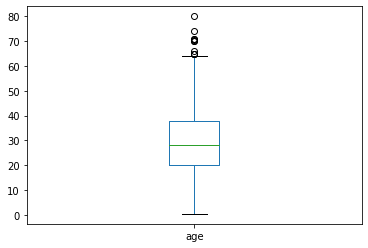

In [138]:
titanic['age'].plot.box() # 시각화. 상자그림으로 보여줌

In [139]:
titanic['age'].median()

28.0

In [141]:
# age를 5단계로나누기
pd.qcut(titanic.age, 5)

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
886     (25.0, 31.8]
887    (0.419, 19.0]
888              NaN
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [143]:
# 5단계로 나눈것에 이름을 주기
age_class = pd.qcut(titanic.age, 5, labels = ['child', 'young', 'middle', 'old', 'very old'])

In [145]:
type(age_class)

pandas.core.series.Series

In [146]:
titanic['age_class'] = age_class

In [147]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle


In [148]:
# 상관관계 : 상관계수(-1 ~ 1)
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [156]:
# fare를  3단계의 'fare_class로 추가'
# fare를 3단계로 나눈 후 fare_class 열을 추가함
titanic['fare_class'] = pd.qcut(titanic.fare, 3, labels=['Third', 'Second', 'First'])
# 비교하기 편하게 제일 마지막에 class 추가. 별의미 없음
titanic['class2'] = titanic['class']
titanic
# pd.qcut(titanic.fare, 3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class,fare_class,class2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,Third,Third
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old,First,First
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle,Third,Third
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old,First,First
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old,Third,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle,Second,Second
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,First,First
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,Second,Third
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle,First,First


## 날짜 다루기 : pd.to_datetime(['2020-05-27'])

In [ ]:
# POSIX 시간표기법 : 1970년 1월 1일(1677~2262)